# importing librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Travel Review Data set

In [2]:
df=pd.read_csv('tripadvisor_review.csv',index_col=['User ID'])

In [3]:
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
User ID,,,,,,,,,,
User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


# Feature selection using correlation matrix with Heatmap

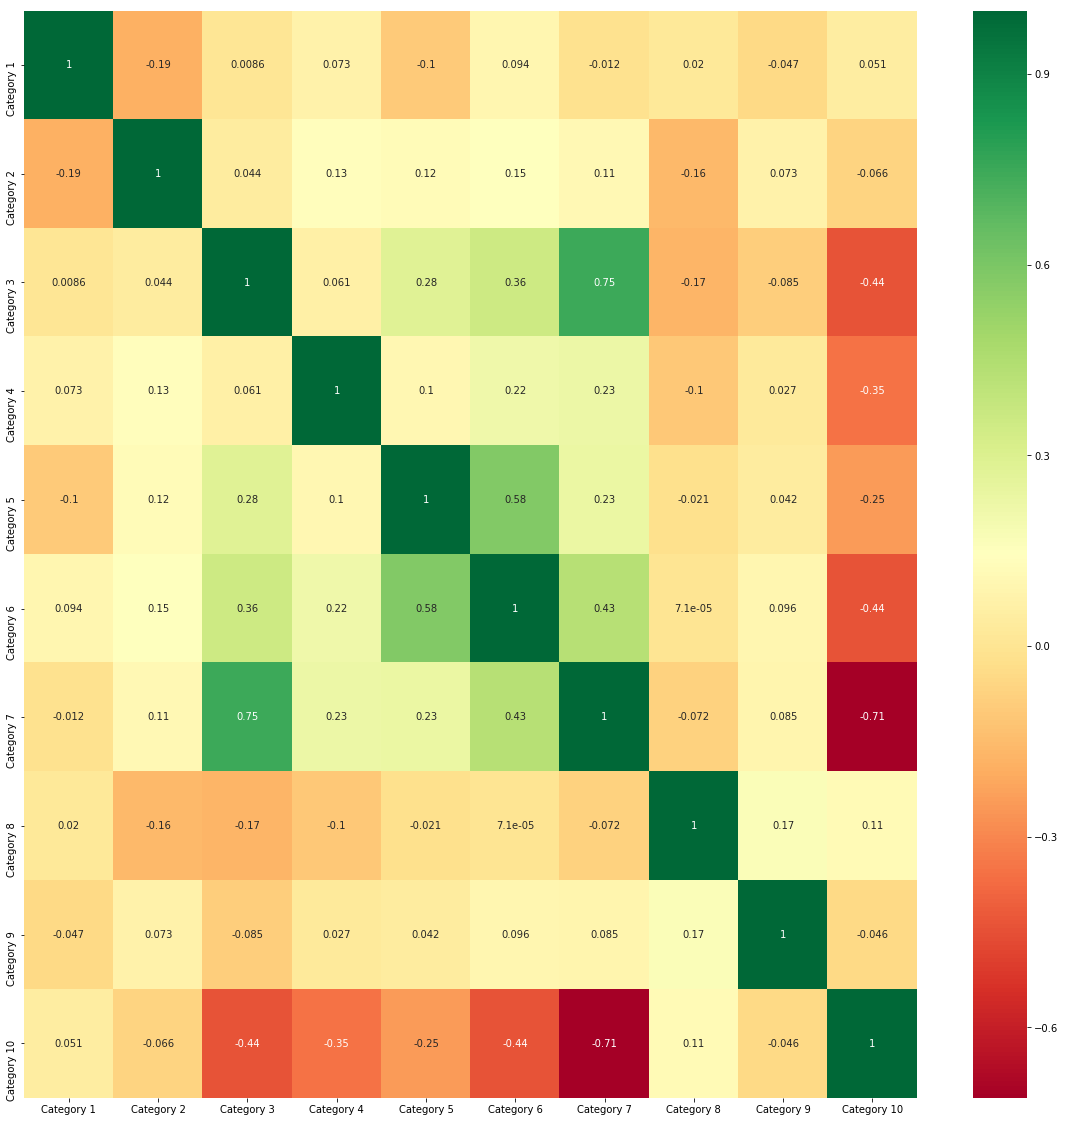

In [4]:
cormat = df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

from the above feature with highest positive correlation are selecting to perform clustering.The features('Category 7' and 'Category 3') have high correlation of 0.75.

# checking for null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, User 1 to User 980
Data columns (total 10 columns):
Category 1     980 non-null float64
Category 2     980 non-null float64
Category 3     980 non-null float64
Category 4     980 non-null float64
Category 5     980 non-null float64
Category 6     980 non-null float64
Category 7     980 non-null float64
Category 8     980 non-null float64
Category 9     980 non-null float64
Category 10    980 non-null float64
dtypes: float64(10)
memory usage: 84.2+ KB


In [6]:
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [7]:
df.shape

(980, 10)

In [8]:
df.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

# finding distribution of each features using Histogram

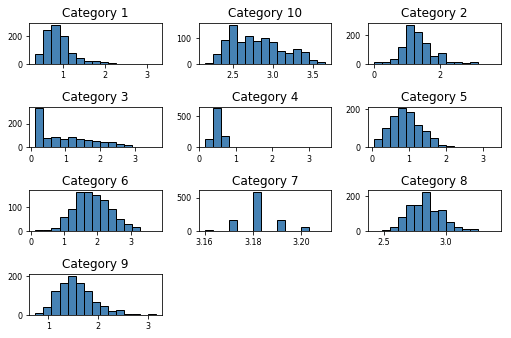

In [9]:
df.hist(bins=15,color='steelblue',edgecolor='black',linewidth=1.0,xlabelsize=8,ylabelsize=8,grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

# Pair plot for the given data

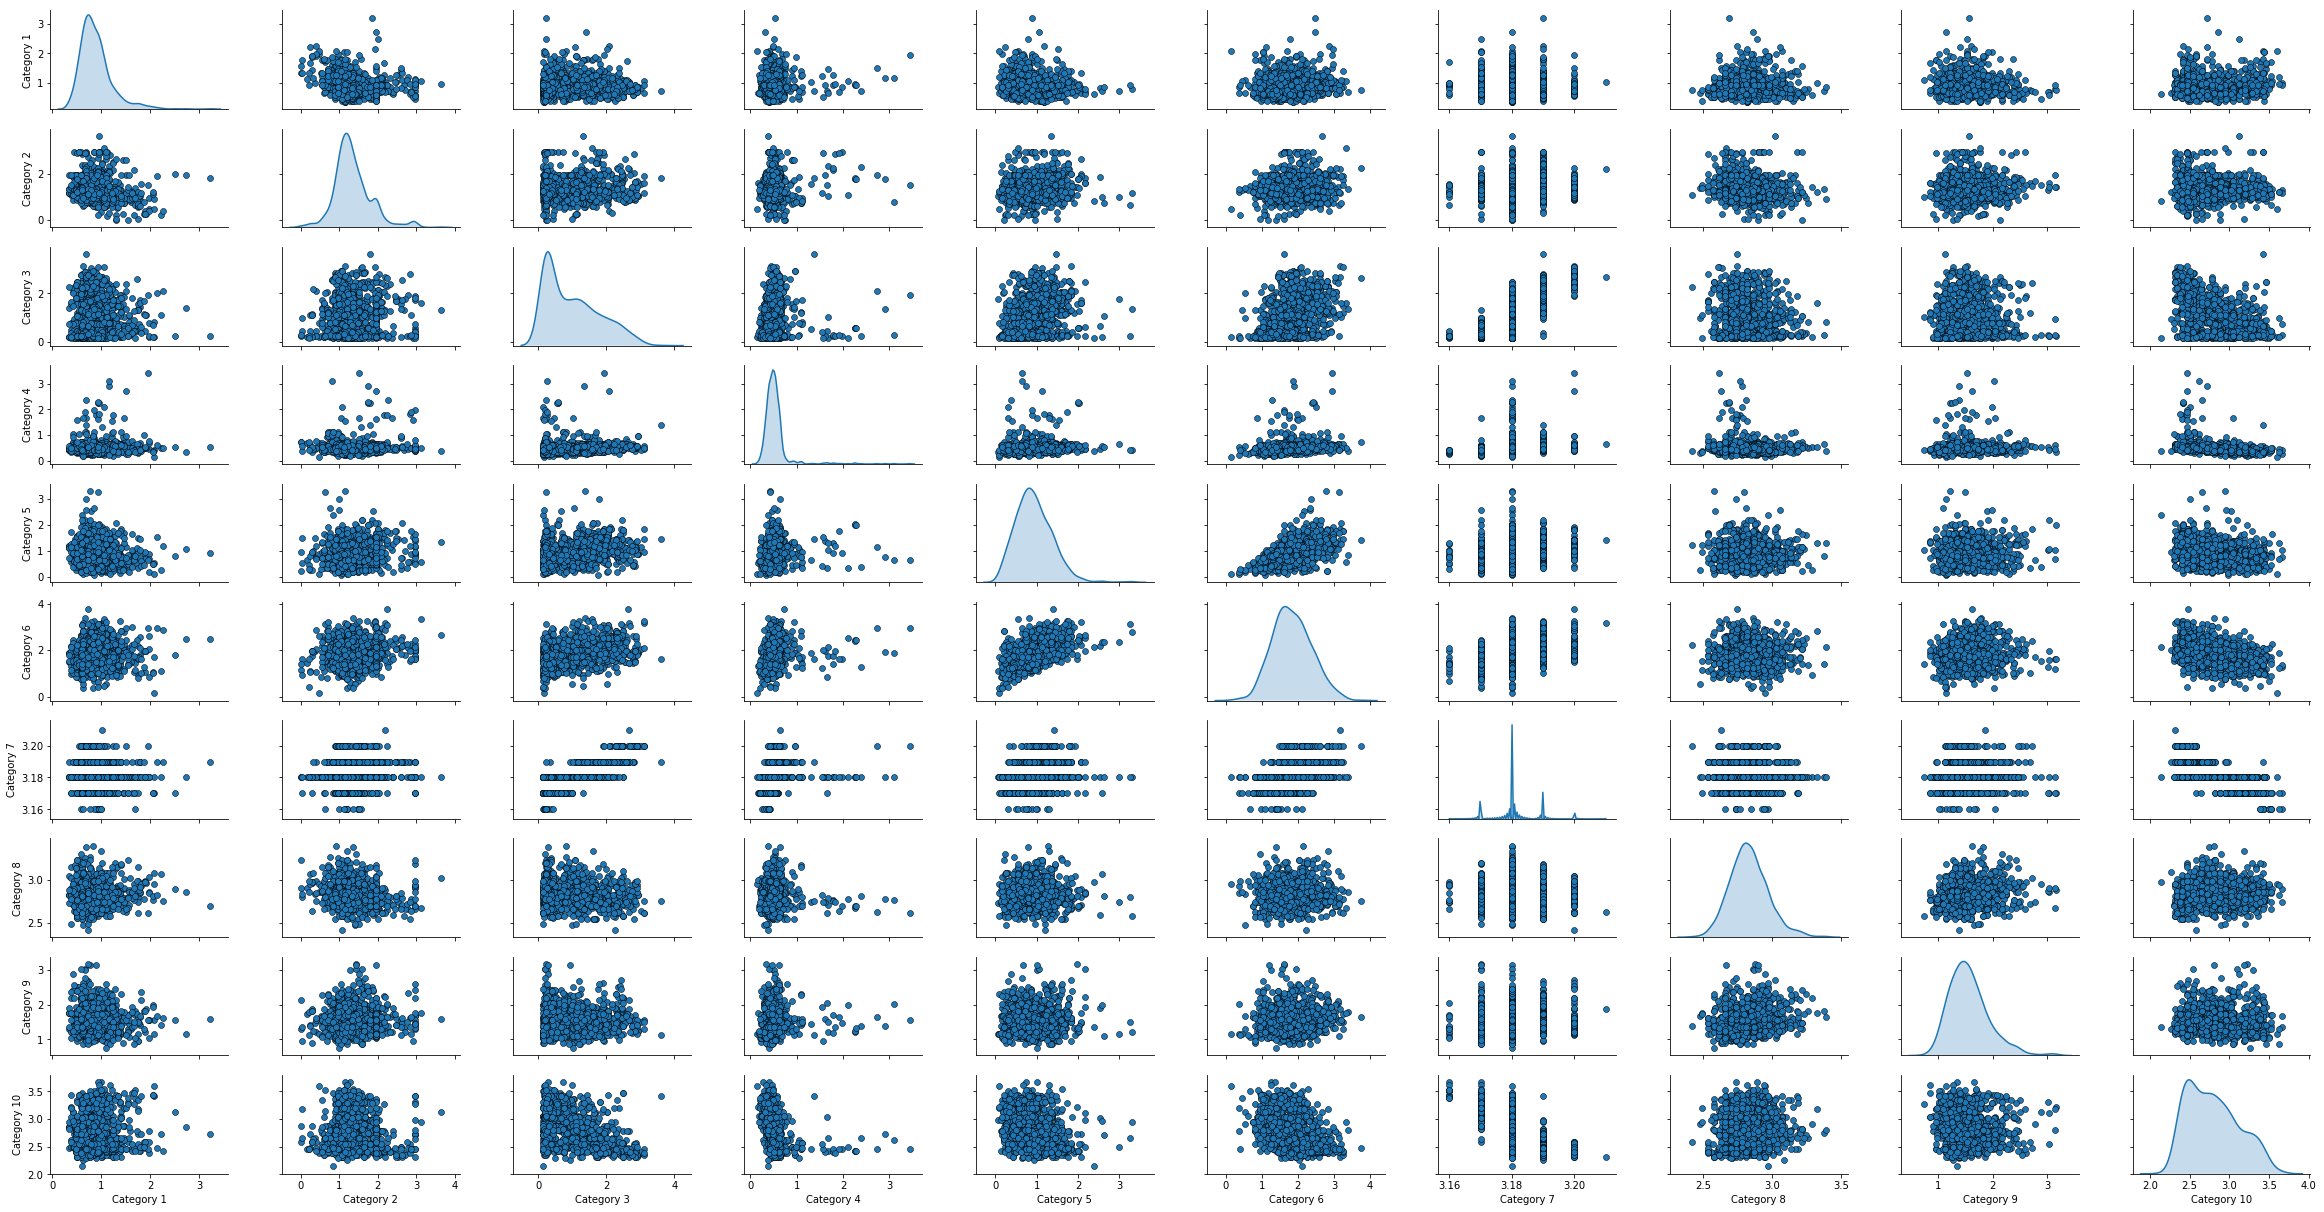

In [10]:
pp=sns.pairplot(df,height=1.8,aspect=1.8,
                plot_kws=dict(edgecolor="k",linewidth=0.5),
                diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig
fig.subplots_adjust(top=0.93,wspace=0.3)

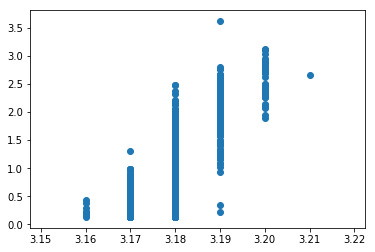

In [11]:
x=df['Category 7']
y=df['Category 3']
plt.scatter(x,y)

plt.show()

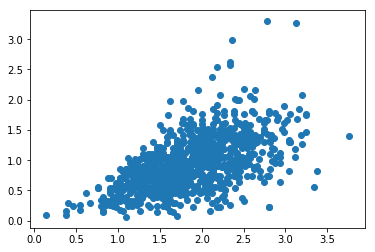

In [12]:
x=df['Category 6']
y=df['Category 5']
plt.scatter(x,y)
plt.show()

# Normalizing the data

In [13]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.141236,0.273359,0.347774,0.094157,0.121493,0.367516,0.484453,0.423707,0.276397,0.367516
1,0.142054,0.306392,0.370456,0.089132,0.197762,0.442875,0.447054,0.366278,0.259040,0.323104
2,0.218947,0.143572,0.096911,0.095116,0.043072,0.276376,0.570698,0.502501,0.235099,0.448662
3,0.075113,0.300451,0.048406,0.095143,0.076782,0.253714,0.530797,0.494075,0.262060,0.477383
4,0.085531,0.201250,0.197896,0.095594,0.258271,0.338771,0.533312,0.466229,0.197896,0.425979


# Using Hierarchyal clustering

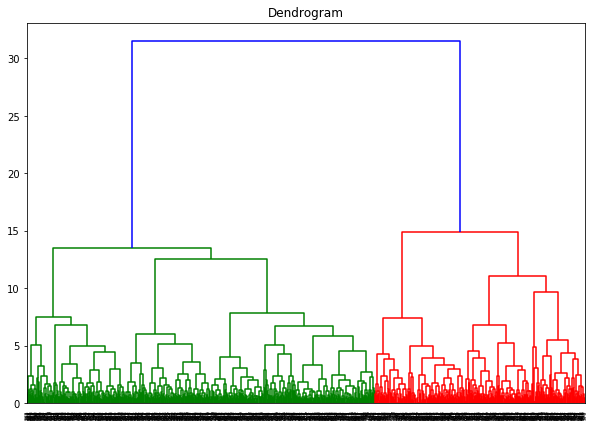

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(df,method='ward'))

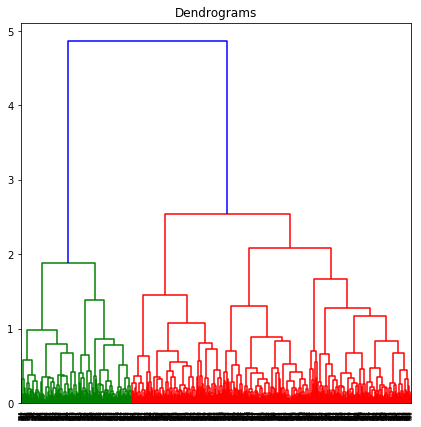

In [19]:
plt.figure(figsize=(7, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [16]:
from sklearn.cluster import AgglomerativeClustering
df1 = df[['Category 3','Category 7']]

cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(df1)

array([2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

# Visualization of Clusters using scatter plot

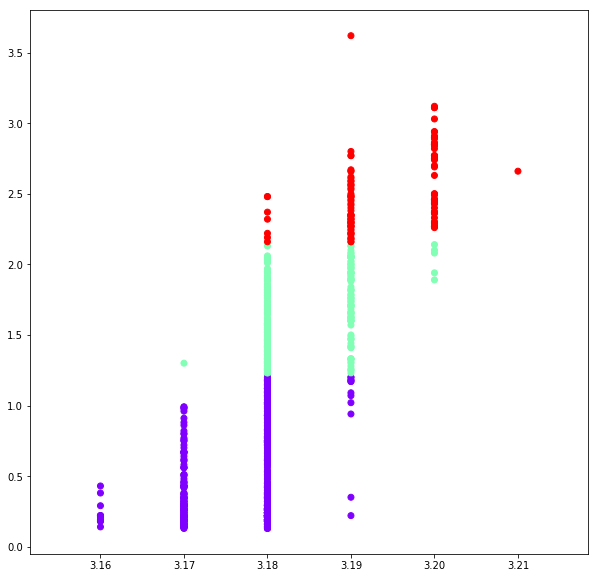

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(df['Category 7'],df['Category 3'],c=cluster.labels_,cmap='rainbow')

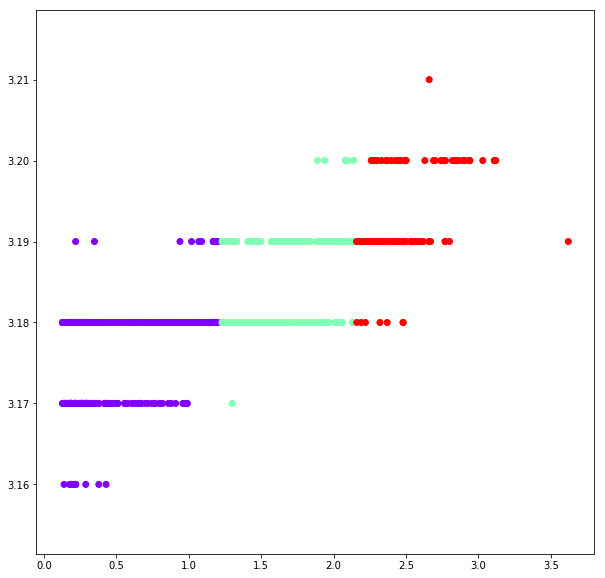

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(df['Category 3'],df['Category 7'],c=cluster.labels_,cmap='rainbow')

# Thank you